# Linear Regression

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png">

In this section, we will describe Linear Regression. We begin with an abstract description of Linear Regression, followed by a practical solution using the Least Squares Approach, and ending with an implementation in code.

Understanding Linear Regression provides a foundation for understanding other types of regression. Not all regressions are the same, and there is no one size fits all solution for regression problems (there are often many variations of solutions even for a specific problem!) but hopefully by getting a feel for the mechanics of linear regression, more complex forms of regression will appear more tangible.

## Abstract Description

Linear Regression is described by Wikipedia as follows:

* linear regression is a linear approach to modelling the relationship between a dependent variable and one or more explanatory variables
    * **simple linear regression** - one explanatory variable
    * **multiple linear regression** - more than one explanatory variable

* relationships are modeled using linear models whose unknown model parameters are estimated from the data

* linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing a penalized version of the least squares cost function as in **ridge regression** (L2-norm penalty) and **lasso** (L1-norm penalty)

In short, linear regression allows us to create a linear model that describes the relationship between explanatory variables and observations. A common method for solving this problem is through Least Squares.

## Least Squares Approach

Linear least squares is the simplest and most commonly applied form of linear regression. It seeks to best fitting straight line by **minimizing the sum of the squares** of the distance (or offsets) between observations in data and the curve.

<img src="https://raw.githubusercontent.com/rasbt/python_reference/master/Images/least_squares_vertical.png" />

### Minimizing with Projection

Let's consider a linear algebra based approach to the linear least squares.

Suppose we have a set of coordinates: $(-1, 0), (0, 1), (1, 2), (2, 1)$.

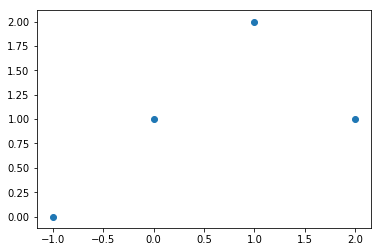

In [3]:
import matplotlib.pyplot as plt
plt.scatter([-1, 0, 1, 2],[0, 1, 2, 1])

We want to find a line $y$ of the form $y = f(x) = mx + b$ that best fits our points. That is to say that we want to find values of $m$ and $b$ that satisfies the sytem:
$$f(-1) = -1m + b = 0$$
$$f(0) = 0m + b = 1$$
$$f(1) = 1m + b = 2$$
$$f(2) = 2m + b = 1$$

As matrices, we could organize these as follows:
$$\begin{bmatrix}
-1 & 1 \\
 0 & 1 \\
 1 & 1 \\
 2 & 1 
\end{bmatrix}
\begin{bmatrix}
 m \\
 b \\
\end{bmatrix}
=
\begin{bmatrix}
 0 \\
 1 \\
 2 \\
 1
\end{bmatrix}$$
We will refer to these matrices as $A$, $\vec{x}$, and $\vec{b}$, and we will find a solution to the problem $A\vec{x} = \vec{b}$. 

In this case, there is no solution to the problem because we have an **overdetermined system**. A system is an **overdetermined system** if there are more equations to unknowns.

Looking at the plot above, we can further see that there is no solution to the problem as it is clear that there is no straight line we can draw that will intersect all 4 points. Therefore, we can say that the vector $\vec{b}$ is **not** in the [column space](https://en.wikipedia.org/wiki/Row_and_column_spaces) of $A$, or $C(A)$.

To visualize how vector $\vec{b}$ is **not** in the column space of $A$, let's imagine that $C(A)$ is a plane. If we were to graph $C(A)$ and $\vec{b}$, it might look something like this:

![image](https://user-images.githubusercontent.com/8890471/44747033-0fd4d900-aada-11e8-99ba-09fa2deb4cf6.png)

This is by no means an *exact* representation, but the important thing to note here is that $\vec{b}$ is not in $C(A)$.

Since $\vec{b}$ is not in $C(A)$, we will instead find a vector $\vec{x}^*$ that is as close (by distance) as possible to $\vec{b}$ and exists in $C(A)$. 

* First, we find a vector in $C(A)$. Multiplying $\vec{x}^*$ by $A$ will result in a vector that exists in $C(A)$, so we will say that the vector $\vec{v} = A\vec{x}^*$.

* Next, we want our vector $\vec{v}$ to be as close to $\vec{b}$ as possible. By definition, the closest vector to $\vec{b}$ that exists in $C(A)$ would be the [projection](https://en.wikipedia.org/wiki/Linear_projection) of $\vec{b}$ onto $C(A)$, so we will say that our vector $\vec{v} = proj_{C(A)}\vec{b}$.

To get some intuition about what the projection is, let's add to our previous visualization:

![image](https://user-images.githubusercontent.com/8890471/44802134-eb840580-ab88-11e8-8835-69ca2a1a082d.png)

In this image, $\vec{v}$ is the projection of $\vec{b}$ onto $C(A)$. Imagine that there were a bright light shining above $\vec{b}$. The projection $\vec{v}$ would be the shadow of $\vec{b}$ cast onto the plane of $C(A)$.

**Quick recap**: We are trying to solve $Ax = b$. Unfortunately, this system is **overdetermined**, and there is no possible $x$ such that the equality would hold. Instead, let's look for some $\vec{x}^*$ that will get us as close as possible. The closest value to $b$ that we can get from $A\vec{x}^*$ would be the projection of $b$ onto $C(A)$. So we are trying to solve: $$A\vec{x}^* = proj_{C(A)}\vec{b}$$

Unfortunately, projections are difficult. If there is an easier way to solve this problem, we should take it. Let's consider this:

Let's subtract $\vec{b}$ from both sides of the equation: $$A\vec{x}^* - \vec{b} = proj_{C(A)}\vec{b} - \vec{b}$$ What we're doing here results in the following:

![image](https://user-images.githubusercontent.com/8890471/44808334-f7c48e80-ab99-11e8-94e4-f6185af0694e.png)

An important feature of this relationship is the length of the vector between $proj_{C(A)}\vec{b}$, or $\vec{v}$, and $\vec{b}$. Recall that the Least Squares approach to Linear Regression is called so because it aims to minimize the sum of the squares of the distances between the estimated line and the real observed points. If we were to perform the calculation for the length of that vector squared, it would appear as follows:
$$
\bigg\Vert
\begin{bmatrix}
 b_1 - v_1 \\
 b_2 - v_2 \\
 \dots     \\
 b_n - v_n
\end{bmatrix}
\bigg\Vert^2
=
\sqrt{(b_1 - v_1)^2 + (b_2 - v_2)^2 + \dots (b_n - v_n)^2}^2
$$

Cancel out the square root, and we're left with the following:
$$
(b_1 - v_1)^2 + (b_2 - v_2)^2 + \dots (b_n - v_n)^2
$$
The sum of squares! Recall that $\vec{b}$ represents our real observations, and $\vec{v}$ is the projection of $\vec{b}$ onto the column space of our explanatory variables. So, by definition, $\vec{v}$ is as close to $\vec{b}$ as we can get in $C(A)$, and the length of $\vec{b} - \vec{v}$ is minimized, solving the Least Squares problem.

Now that we have established that this approach is a solution to the Least Squares problem, we will continue to solve it. Because the vector $\vec{b} - \vec{v}$ is orthogonal to $C(A)$, we could also say that it is a member of the orthogonal column space of $A$, or $C(A)^{\perp}$.

This is an interesting realization, because $C(A)^{\perp}$ is equal to the nullspace of $A$ transpose, or $N(A^T)$! So, we can say that $A\vec{x}^* - \vec{b} \in N(A^T)$.

Recall that multiplying by a space makes something a member of that space, it follows that: $$A^T(A\vec{x}^* -\vec{b}) = N(A^T) = \vec{0}$$

If we distribute and solve:

$$A^TA\vec{x}^* -A^T\vec{b} = \vec{0}$$

$$A^TA\vec{x}^* = A^T\vec{b}$$

Finally, we multiply both sides by $(A^TA)^{-1}$. We know what $A^TA$ is invertible, because any matrix times its transpose is square. This leaves us with the following:

$$\vec{x}^* = (A^TA)^{-1}A^T\vec{b}$$

Perfect! We've arrived at a clear answer. Next, we'll solve our original problem with some code.

### Least Squares in Code

Suppose again that we have the set of coordinates: $(-1, 0), (0, 1), (1, 2), (2, 1)$.

Let's solve through $\vec{x}^* = (A^TA)^{-1}A^T\vec{b}$.

m = 0.4
b = 0.8


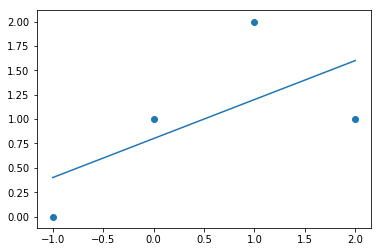

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = [-1, 0, 1, 2]
y = [0, 1, 2, 1]

# Set up matrices
A = np.array([x, np.ones(len(x))]).T
b = np.array(y).T

# (A transpose * A) ^ -1 * A transpose * b
x_star = np.linalg.inv(A.T @ A) @ A.T @ b

# x = [m, b]
m = x_star[0]
b = x_star[1]

print('m =', m)
print('b =', b)

x_plot = np.linspace(-1, 2, 100)
y_plot = m * x_plot + b

plt.scatter(x,y)
plt.plot(x_plot, y_plot)

Look at that! We got a line that fits our points. Pat yourself on the back.

## Summary

* **linear regression** allows us to model the relationship between explanatory variables and observations. For example, linear regression could model observed concert ticket prices given the relationship between a number of explanatory variables such as available seats, seat location, and artist
* **linear least squares** is an applied form of linear regression. Linear least squares tries to fit a line to a set of points such that the total squared distance between each point and the line is minimized
* an **overdetermined system** has more equations to unknowns, so there does **not exist** a solution to the problem. We can find a solution to an overdetermined system through the use of a **projection**, namely $proj_{C(A)}\vec{b}$
* our solution to **linear least squares** with linear algebra is:
$$\vec{x}^* = (A^TA)^{-1}A^T\vec{b}$$

Given that we have a single step solution to multiple linear equations, [why don't we see more people using this linear algebra approach](https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution/278773#278773)?

Inverting a matrix costs $O(N^3)$ where $N$ is the number of rows in $A^T \cdot A$ i.e. the observations. In addition, if the $A^T \cdot A$ is [ill-conditioned](http://www.cs.uleth.ca/~holzmann/notes/illconditioned.pdf), then it will create errors in the estimation.

So if we have many observations, we need another method to deal with an overdetermined system. We can use **calculus**! The method we will use to solve linear least squares is called **gradient descent**.

# Gradient Descent

**Gradient descent** is used to find the minimum of a function. When we perform linear least squares, our goal is to fit a line to a set of points and **minimize** the total squared distance between each point and the line. That total squared distance between each point and a line can be represented as a function called a **cost function**. Gradient descent **iteratively** moves in the **direction of steepest descent** as defined by the **negative of the gradient**. At each iteration, **theta** (the vector of coefficients of the model function) will be updated.

The theta update is captured by subtracting the **learning rate**, _alpha_, multiplied by the **gradient of the cost function**, $J$:

$\alpha = $ learning rate

$J(\theta)$ = cost function

$$\theta := \theta - \alpha * \frac{\partial}{\partial \theta_j} J(\theta) $$

![image](https://user-images.githubusercontent.com/7232635/44599603-e13ac380-a7a4-11e8-8e91-2b3cba9d231f.png)

(In the diagram above, you can think of the **initial weight** as the initial $\theta$ or coefficients in $f(x)$)

Before we go into the derivation of gradient descent and its applications, let's visit the **cost function**.

# Cost Functions

Cost functions are a measurement of the **performance** of the model. To find a model that best fits the data, use a cost function. Minimizing the cost function lends to better models, as a low cost would imply that the predictions are not far from the actual values. In the following section, we will see how making small tweaks to parameters of the model with the goal of minimizing the cost outputs a model that fits to the data well.

Two such cost functions are **residual sum of squares (RSS)** and **mean squared error (MSE)**.

## Residual Sum of Squares (RSS)

**RSS** is a measure of the discrepancy, or error, between the data and function modelling the data.

**RSS** is the **sum of squared residuals** (or sum of squared error). 

$$RSS = \sum_{i=1}^{n}(y_i - f(x_i))^2$$

This is exactly what we used in our linear least squares example using linear algebra!

![image](https://user-images.githubusercontent.com/7232635/44668546-b9896c80-a9eb-11e8-9b81-510eb68ecc19.png)

A **residual**, $r$ is the distance between $y_{observed}$ and $y_{predicted}$

$$r_i = y_{observed} - y_{predicted} = y_i - f(x_i)$$

### Why Square the Error in RSS

Squaring the error provides **nicer mathematical properties** when it comes **minimizing a cost function**. When minimizing a function, taking a **derivative** (or **gradient**) should come to mind. Taking a derivative of a **squared error** is a lot more friendly than a derivative of the **absolute value** of the error. A squared error is continuously differentiable (differentiable everywhere), whereas the absolute error is not continuously differentiable, since its derivative is undefined at $0$.

**The absolute value of the error is not differentiable at 0:**
![image](https://user-images.githubusercontent.com/7232635/44669524-15ed8b80-a9ee-11e8-8179-9e7e2ff63668.png)

**WARNING:** Squared error punishes outliers heavily. This means that the outliers may end up dominating the error. For example, you could have a set of residuals, $R = [0.1, 0.4, 20, 0.3, 0.1]$. Though 4 of the residuals are very small, the one outlier $20$ will make the error very large, even though the function may model the values well apart from the single outlier.


## Mean Squared Error (MSE) (L2 Loss) (Quadratic Loss)

**MSE** is one of the most commonly used loss functions for regression. **MSE** is the average of the sum of square errors. **MSE** is proportional to **RSS**, since **MSE** is **RSS** divided by the total number of samples, $N$. $N$ can also be considered as the **number of degrees of freedom**.

$$MSE = \frac{1}{N}RSS  = \frac{1}{N}\sum(r_i)^2 = \frac{1}{N}\sum(y_i - f(x_i))^2$$

![image](https://user-images.githubusercontent.com/7232635/44684599-7a711080-aa17-11e8-815e-4b62971268b4.png)

## Mean Absolute Error (MAE) (L1 Loss)

$$MAE = \sum_{i=1}^{n}\frac{|(y_i - x_i)|}{n}$$

![image](https://user-images.githubusercontent.com/7232635/44684691-b73d0780-aa17-11e8-866d-9e3f0d6b8bf7.png)

| MSE | MAE |
|:----|:----|
| squared error is easier to solve | absolute error is harder to solve |
| less robust to outliers | more robust to outliers |

Now that we have gone over some popular cost functions, we can derive the gradient descent algorithm. The gradient descent algorithm works for **any cost function**, there's not one specific cost function that gradient descent uses.

## Deriving the Gradient Descent Algorithm

Suppose we are trying to fit a function $f(x)$ to a set of points. Since we can use **any cost function** that works best for our data when performing gradient descent, let's choose a cost function we have not seen yet for more practice. Let our cost function be the **least mean squares (LMS) cost function**. Our goal will be to minimize our cost function, $J(\theta)$, and $J(\theta)$ will be equal to the **LMS cost function**. $f(x_i)$ is the output of our function we fit for point $x_i$ and $y_i$ is our actual output:

$$LMS = J(\theta) = \frac{1}{2}\sum_{i=1}^{N}(f(x_i) - y_i)^2$$

Given that we need to minimize this cost function, we will need to take the **derivative** of this cost function to minimize it. To make taking derivatives more clear,  let's suppose we have a **single training example**, the **$j$th training example**, so that we can remove the **summation** of the $N$ training examples.

The following equation shows the result of taking the partial derivative of the **LMS** cost function with respect to $\theta_j$:

$$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{\partial}{\partial\theta_j}\frac{1}{2}(f(x) - y)^2$$

Using the **chain rule** we have:

$$ \frac{\partial}{\partial\theta_j}J(\theta) = 2 * \frac{1}{2}(f(x) - y) * \frac{\partial}{\partial\theta_j}(f(x) - y) $$

Sub in $\sum_{i=1}^{N}\theta_i \cdot x_i$ for $f(x)$, since our function $f(x) = \theta_0' + \theta_1' \cdot x_1 + ... + \theta_N' \cdot x_N $ that we are trying to fit to the points is of this structure:

$$ \frac{\partial}{\partial\theta_j}J(\theta) = (f(x) - y) \cdot \frac{\partial}{\partial\theta_j}(\theta_0 + \sum_{i=1}^{N}\theta_i' \cdot x_i - y) $$

$$ \frac{\partial}{\partial\theta_j}J(\theta) = (f(x) - y) \cdot x_j $$

_Recall, in gradient descent, the theta update is captured by subtracting the **learning rate**, $\alpha$, multiplied by the **gradient of the cost function**, $J$:_

$\alpha = $ learning rate

$J(\theta)$ = cost function

$$\theta := \theta - \alpha * \frac{\partial}{\partial \theta_j} J(\theta) $$

Since we know the derivative for a single training example, we can make an update to **theta** for a **single training example** by subbing in what we found for $\frac{\partial}{\partial\theta_j}J(\theta)$:

$$ \theta_j := \theta_j - \alpha \cdot (f(x) - y) \cdot x_j$$

Now, let's modify the theta update so that it can work for **multiple training examples** by reintroducing the summation:

$$ \theta_0 := \theta_0 - \alpha \sum_{i=1}^{N} (f(x_i) - y_i) $$
$$ \theta_j := \theta_j - \alpha \sum_{i=1}^{N} (f(x_i) - y_i) \cdot x_j$$

**Notice that $\theta_0$'s cost gradient is different and does not include a dot product with $x_j$.** This is because our function, $f(x)$, we are using as our model is represented by: $f(x) = \theta_0 + \theta_1' \cdot x_1 + ... + \theta_N' \cdot x_N $ and $\theta_0$ is not dotted with $x$.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Gradient Descent Example

Suppose we are given a dataset: 

$X$ = $\begin{bmatrix}
    1 \\
    2 \\
    4 \\
    3 \\
    5
\end{bmatrix}$, $y$ = $\begin{bmatrix}
    1 \\
    3 \\
    3 \\
    2 \\
    5
\end{bmatrix}$

In [3]:
train_X = np.array([[1], [2], [4], [3], [5]])
train_y = np.array([[1], [3], [3], [2], [5]])

The data when plotted looks like the figure below.

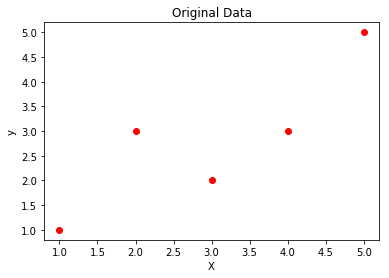

In [5]:
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(train_X, train_y, 'ro')

Our goal will be to use **gradient descent** to find a **line** that fits to the points which minimizes the **MSE Cost Function**.

Recall, the **MSE** cost function can be represented as:

$$ J(\theta) = \frac{1}{N}\sum_{i=1}^{N}(f(x_i) - y_i)^2$$

where:

* $N$ is the number of training examples (the number of red points)
* $x_i$ is the input vector for the `ith` training example
* $y_i$ is the class label of the `ith` training example
* $\theta$ is the chosen parameter values (or weights), i.e. ($\theta_0$, $\theta_1$, ... $\theta_N$)
* $f(x_i)$ is the prediction for the `ith` training example using the parameters $\theta$

When performing gradient descent, we will need to compute the **gradient of the cost function**, $J_{grad}$:

$$ \frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{N}\sum_{i=1}^{N}(\theta' \cdot x_i - y_i) \cdot x_i $$

We need the **gradient of the cost function**, so that we can update the coefficients of the line we want to fit to our set of points. But how do we represent $ \frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{N}\sum_{i=1}^{N}(\theta' \cdot x_i - y_i) \cdot x_i $ in code?

Let's use linear algebra, that way we won't have to use a lot of for loops. With linear algebra, the summation can be expressed with matrices as:

$$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{2}{N}\sum_{i=1}^{N}(\theta' \cdot x_i - y_i) \cdot x_i = \frac{2}{N}[X' \cdot (X \cdot \theta - Y)]$$

For more information on how we derived this, read **Aside 1** at the bottom of this notebook.

## Normalize the Data Before Gradient Descent

Before performing gradient descent, there's some preprocessing ([normalizing features](https://en.wikipedia.org/wiki/Feature_scaling)) that needs to be done to the data to allow for `faster convergence`. Do **MinMax normalization** on the data so that it falls within $[0, 1]$.

The **MinMax Normalization** Equation is represented as:

$$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

The figure below shows gradient descent with un-normalized and normalized data. After data normalization, you can see there's a lot less steps as there's not as many zig-zagging steps to find the minimum.

![image](https://user-images.githubusercontent.com/7232635/44600279-cec18980-a7a6-11e8-84af-1a30169f0f62.png)

In [6]:
# normalize features between [0, 1]
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

Let's look at a plot of the data after it's been normalized. The values should be in $[0, 1]$

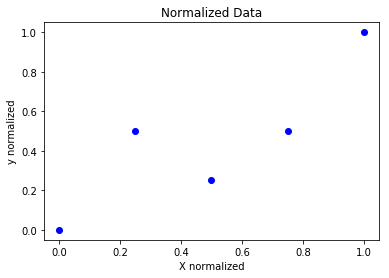

In [8]:
X_norm = normalize(train_X)
y_norm = normalize(train_y)
plt.title('Normalized Data')
plt.xlabel('X normalized')
plt.ylabel('y normalized')
plt.plot(X_norm, y_norm, 'bo')

## Add a Column of Ones to X

Recall, when performing gradient descent, we will be performing the $\theta$ update with: $$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{2}{N}[X' \cdot (X \cdot \theta - Y)]$$

To take the dot product for $X\theta$, we will need to concatenate a column of ones to X. This is because the first $\theta_0$ is not being multiplied by $x$.

In [12]:
# prepare X by concatenating a column of rows
column_of_ones = np.ones((len(y_norm), 1))
X_norm = np.concatenate((column_of_ones, X_norm), axis=1)
X_norm

array([[1.  , 0.  ],
       [1.  , 0.25],
       [1.  , 0.75],
       [1.  , 0.5 ],
       [1.  , 1.  ]])

## Initialize Theta

How you choose your initial $\theta$ (coefficients of your line you fit to the data) depends on whether or not you **normalized** your data before performing gradient descent.

| Normalized Data | Non-Normalized Data |
|:--------------- |:--------------------|
| initialize theta to **zeros** as data is normalized around **0** | must pick a **smart starting point** for $\theta$ close to where you think the optimum is (which may not be around 0) |
| will take less steps to converge | will take more steps to converge |

#### Example

Suppose your data is **normalized** by performing **minmax normalization** (see below for formula) so that the data are in the set $[0, 1]$. Suppose $X = [[0.5], [-0.25], [0.75]], y = [[0.1], [0.2], [-0.3]]$. 

It's known that $dim(X) = (3, 1)$. $X$ has $3$ **rows** and $1$ **feature**. 

Given this information, we should initialize theta such that $dim(\theta) = (len(features) + 1, 1) = (2, 1)$. 

Therefore, $\theta_{initial} = [[0.], [0.]]$

Using X_norm, initialize $\theta$ to the correct size and all of its values should be zeros, since we normalized our data.

In [13]:
# theta is number of features + 1 (the +1 is for the intercept)
theta = np.zeros((X_norm.shape[1], 1))
theta.shape

(2, 1)

Now that we have normalized $X$, added a column of $1$s to $X$, and initialized $\theta$, we can write the gradient descent algorithm.

## Gradient Descent Implementation

The following code implements gradient descent. Specifically, the cost_gradient computes: 

$$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{2}{N}[X' \cdot (X \cdot \theta - Y)]$$

Again, if the implementation is unclear, refer to Aside 1 for a more visual representation with matrices.

In [15]:
def cost(X, y, theta):
    m = len(y)
    hypothesis = np.dot(X, theta)
    error = hypothesis - y
    return (1.0 / m) * np.sum(error**2)

def cost_gradient(X, y, theta):
    m = len(y)
    hypothesis = np.dot(X, theta)         # step 1
    error = hypothesis - y                # step 2
    return (2.0 / m) * np.dot(X.T, error) # step 3

def gradient_descent(max_epochs, tolerance, X, y, theta, learning_rate):
    costs = []
    curr_epoch = 0
    while (curr_epoch < max_epochs):
        # update theta
        theta = theta - learning_rate * cost_gradient(X, y, theta)
        
        # update cost
        J = cost(X, y, theta)
        
        if curr_epoch % 10 == 0:
            costs.append(J)
                
        curr_epoch += 1
    return theta, costs

max_epochs = 2000
tolerance = 0.001
learning_rate = 0.01
final_theta, costs = gradient_descent(max_epochs, tolerance, X_norm, y_norm, theta, learning_rate)

print(final_theta)

[[0.05650421]
 [0.7882648 ]]


Let's plot our line we found that best fits the points given that we know our $\theta$ parameters.

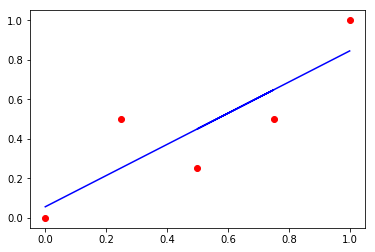

In [16]:
plt.plot(X_norm[:, 1], y_norm, 'ro', X_norm[:, 1], np.dot(X_norm, final_theta), 'b')

This isn't bad. We were pretty lucky when choosing our learning rate of $0.01$. What if we didn't choose a good learning rate for this optimization. How would the fit change? Let's plot the results of gradient descent using different learning rates:

## Analyzing How Learning Rates Affect Error

The learning rate that performed the best and had the lowest error was $0.1$ and had the fastest convergence. The worst performing learning rate was $0.0001$ and didn't finish converging on the minimum since the error never leveled out. If we had used more than $2000$ epochs, then we would have had more steps to reach the minimum, so the $0.0001$ learning rate could have done better.

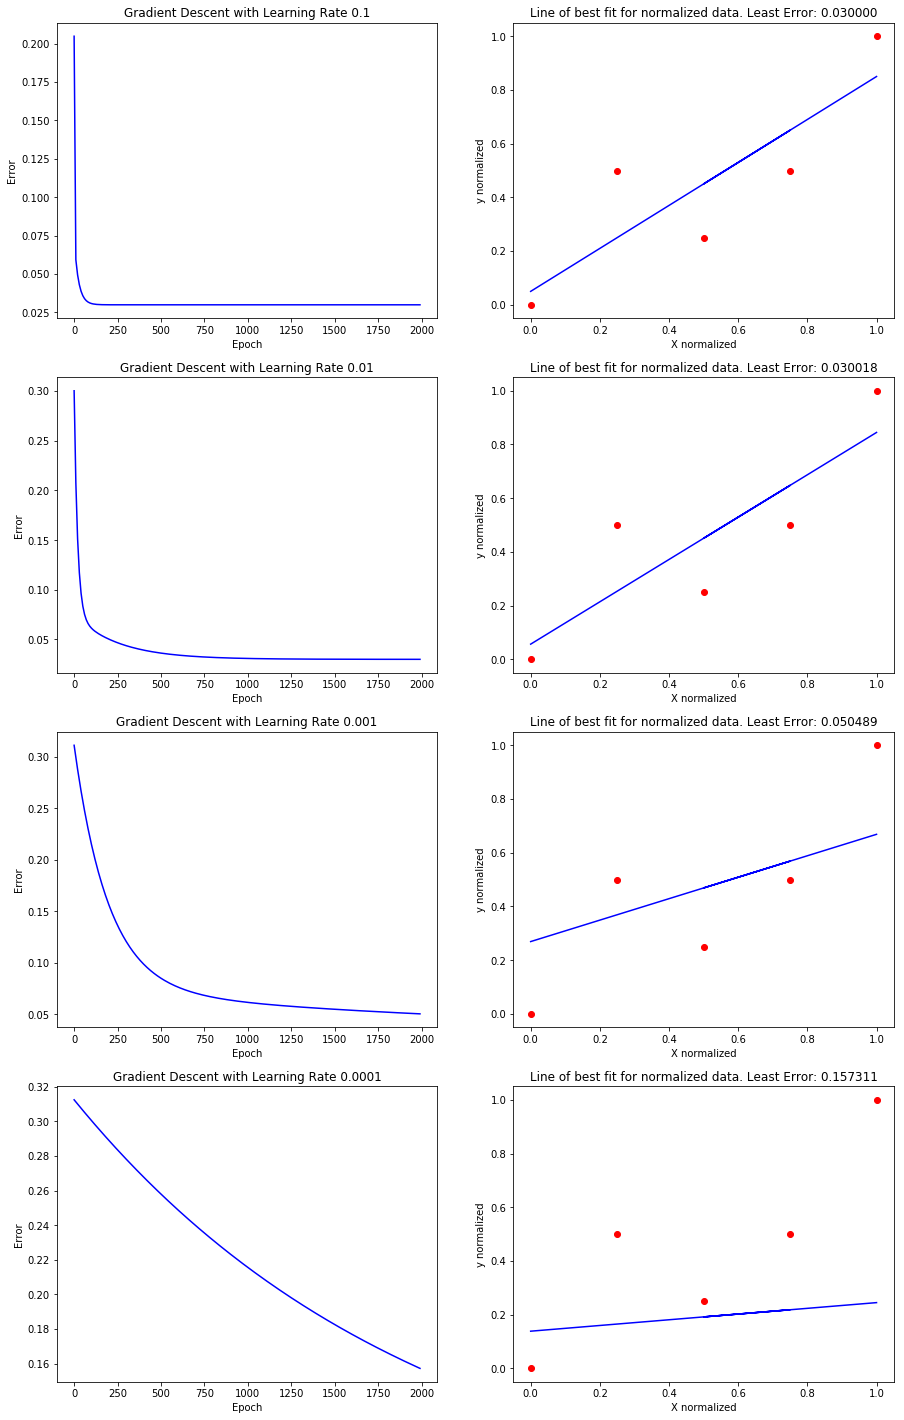

In [17]:
max_epochs = 2000
tolerance = 0.001
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = [ epoch for epoch in range(max_epochs) if (epoch % 10 == 0)]

fig, axes = plt.subplots(len(learning_rates), 2, figsize=(15, 25))

for i, learning_rate in enumerate(learning_rates):
    final_theta, costs = gradient_descent(max_epochs, tolerance, X_norm, y_norm, theta, learning_rate)
    
    axes[i][0].set_title('Gradient Descent with Learning Rate {}'.format(learning_rate))
    axes[i][0].set_xlabel('Epoch')
    axes[i][0].set_ylabel('Error')
    axes[i][0].plot(epochs, costs, 'b')
    
    least_cost = costs[-1]
    axes[i][1].set_title(f'Line of best fit for normalized data. Least Error: {least_cost:.6f}'.format(least_cost))
    axes[i][1].set_xlabel('X normalized')
    axes[i][1].set_ylabel('y normalized')
    axes[i][1].plot(X_norm[:, 1], y_norm, 'ro', X_norm[:, 1], np.dot(X_norm, final_theta), 'b')

## Learning Rate

Too high of a learning rate and gradient descent will **diverge**, too low a learning rate and gradient descent will take an **extremely long time to converge**.

![image](https://user-images.githubusercontent.com/7232635/44600184-81ddb300-a7a6-11e8-9fc8-b14ea0f0ccb4.png)

Typically, you would select a learning rate in the range $[0.1, 0.00001]$.

## Conclusion

We have now implemented gradient descent to minimize the MSE cost function. We used calculus rather than the linear algebra method at the beginning, since computing the inverse is expensive.

Even though we found that gradient descent with calculus is more practical to use than the linear algebra method, there are some limitations with gradient descent.

### Limitations of Gradient Descent

* Only works for problems which have a `well-defined convex optimization` problem 
* Does poorly with `non-convex` and `non-strongly convex` optimization problems
* Suffers with `saddle points` and multiple local minima

Below we have examples of these optimization problems:

#### Well-Defined Convex Optimization Problem

![image](https://user-images.githubusercontent.com/7232635/44543527-c6514c00-a6dd-11e8-894d-5c5ec6396c4a.png)

#### Non-Convex Optimization Problem

![image](https://user-images.githubusercontent.com/7232635/44543469-9bff8e80-a6dd-11e8-86e9-72f46df21ee6.png)

#### Non-Strongly Convex Optimization Problem

![image](https://user-images.githubusercontent.com/7232635/44543891-d4ec3300-a6de-11e8-931e-49b39ddbf2de.png)

#### Saddle Point

![image](https://user-images.githubusercontent.com/7232635/44543643-1d572100-a6de-11e8-9826-28bcca8ca6b5.png)

Specifically for saddle points, gradient descent or stochastic gradient descent may not perform nearly as well as other optimization algorithms like Adagrad, Adadelta, and RMSprop.

In [19]:
from IPython.display import Image
Image(url='https://www.jeremyjordan.me/content/images/2018/01/opt1.gif')

# Resources

A lot of the equations and some figures from this notebook come from [Andrew Ng's Lecture Material](http://cs229.stanford.edu/notes/cs229-notes1.pdf). If any pieces of gradient descent are unclear, this is a very good resource to gain a deeper understanding.

# Aside 1

We will derive how the partial derivative of the MSE Cost Function can be written as matrices: 
$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{2}{N}\sum_{i=1}^{N}(\theta' \cdot x_i - y_i) \cdot x_i = \frac{2}{N}[X' \cdot (X \cdot \theta - Y)]$:

The summation is really just a dot product, so we can represent the cost function as: $\frac{2}{N}[X' \cdot (X \cdot \theta - Y)]$ Let's analyze how we reached this equation from the summation expression step by step.

Before we begin translating the summation expression to a matrix expression, we need to address how we can handle the $ X \cdot \theta $ part. Notice that the dimensions of $X$ and $\theta$ do not match, since there's an extra $\theta_0$ in $\theta$. This $\theta_0$ should not multiplied by any $X$ value, so we should fix the dimension mismatch problem by adding a column of ones to $X$:

$X$ = $\begin{bmatrix}
    1 & x_{11} & x_{12} & x_{13} & \dots & x_{1N} \\
    1 & x_{21} & x_{22} & x_{23} & \dots & x_{2N} \\
    1 & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{M1}  & x_{M2} & x_{M3} & \dots & x_{MN}
\end{bmatrix}$ a $M x (N+1)$ matrix

**Step 1:** Now, we can start by solving the $ X \cdot \theta $ part of the equation. Notice that the first term in each linear equation is the $\theta_0$'s. This was possible by adding the column of 1's to $X$ before performing the dot product:

$X \cdot \theta$ = $\begin{bmatrix}
    \theta_0 + \theta_1 x_{11} + \theta_2 x_{12} + \theta_3 x_{13} + \dots + \theta_N x_{1N} \\
    \theta_0 + \theta_1 x_{21} + \theta_2 x_{22} + \theta_3 x_{23} + \dots + \theta_N x_{2N} \\
    \dots \\
    \theta_0 + \theta_1 x_{M1} + \theta_2 x_{M2} + \theta_3 x_{M3} + \dots + \theta_N x_{MN}
\end{bmatrix}$ a $M x 1$ matrix

**Step 2:** Next, subtract Y:

$X \cdot \theta - Y$ = $\begin{bmatrix}
    \theta_0 + \theta_1 x_{11} + \theta_2 x_{12} + \theta_3 x_{13} + \dots + \theta_N x_{1N} - y_{1} \\
    \theta_0 + \theta_1 x_{21} + \theta_2 x_{22} + \theta_3 x_{23} + \dots + \theta_N x_{2N} - y_{2} \\
    \dots \\
    \theta_0 + \theta_1 x_{M1} + \theta_2 x_{M2} + \theta_3 x_{M3} + \dots + \theta_N x_{MN} - y_{M}
\end{bmatrix}$ a $M x 1$ matrix

**Step 3:** Now take the dot product of that result transposed with $X$ and multiply the resulting product by the coefficient $\frac{2}{N}$:

$\frac{2}{N} [X' \cdot (X \cdot \theta - Y)] = \frac{2}{N} \begin{bmatrix}
    1 & x_{11} & x_{12} & x_{13} & \dots & x_{1N} \\
    1 & x_{21} & x_{22} & x_{23} & \dots & x_{2N} \\
    1 & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{M1}  & x_{M2} & x_{M3} & \dots & x_{MN}
\end{bmatrix}' \cdot \begin{bmatrix}
    \theta_0 + \theta_1 x_{11} + \theta_2 x_{12} + \theta_3 x_{13} + \dots + \theta_N x_{1N} - y_{1} \\
    \theta_0 + \theta_1 x_{21} + \theta_2 x_{22} + \theta_3 x_{23} + \dots + \theta_N x_{2N} - y_{2} \\
    \dots \\
    \theta_0 + \theta_1 x_{M1} + \theta_2 x_{M2} + \theta_3 x_{M3} + \dots + \theta_N x_{MN} - y_{M}
\end{bmatrix} $ a $(N+1) x 1$ matrix

The final dimension $(N+1) x 1$ is desired as it is the same dimension as $\theta$, so we can use this value to update $\theta$ to move along the direction of the gradient.

Therefore, 

$$grad_J(\theta) = \frac{2}{N}\sum_{i=1}^{N}(\theta' \cdot x_i - y_i) \cdot x_i = \frac{2}{N}[X' \cdot (X \cdot \theta - Y)]$$

In the implementation below, you should see this exact implementation in the **cost_gradient** function with the corresponding steps 1, 2, and 3 labeled in the comments.

**Note:** If the order of the **transpose** for the summation's $\theta'x$ and the matrices version $X\theta$ is confusing, see [this post](https://math.stackexchange.com/questions/1478128/for-linear-regression-compute-theta-t-x). The reason for the difference in order and transpose is due to the former dealing with a **single training example** and the latter dealing with **a matrix of training examples**.